In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
## Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks'
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Hien, Dang/gym_members_exercise_tracking.csv')
data.head()

Mounted at /content/gdrive


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
mapping_gender = {'Female': 0, 'Male': 1} ##0: Female, 1: Male
data['Gender'] = [mapping_gender[sex] for sex in data['Gender']]

KIỂM TRA MISSING VALUES VÀ GIÁ TRỊ BẤT THƯỜNG

In [ ]:
# Kiểm tra giá trị trống
missing_values = data.isnull().sum()
print('Các giá trị bị thiếu:')
print(missing_values)

# Kiểm tra các giá trị bất thường
abnormal_values = pd.DataFrame()
for column in data.columns:
    if data[column].dtype != 'object':  # Kiểm tra nếu cột là số học
        abnormal = data[data[column] < 0]  # Kiểm tra giá trị âm
        abnormal_values = pd.concat([abnormal_values, abnormal])

print("Các giá trị bất thường:")
print(abnormal_values)

Các giá trị bị thiếu:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
Các giá trị bất thường:
Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []


THỐNG KÊ TỔNG QUÁT

In [ ]:
# Thống kê cơ bản về các cột số học
numerical_columns = data.select_dtypes(include=['int64', 'float64'])  # Lựa chọn các cột số học

# Tạo DataFrame chứa các thống kê cơ bản
basic_stats = pd.DataFrame({
    'Số lượng': numerical_columns.count(),
    'Trung bình': numerical_columns.mean(),
    'Độ lệch chuẩn': numerical_columns.std(),
    'Giá trị nhỏ nhất': numerical_columns.min(),
    'Giá trị lớn nhất': numerical_columns.max()
})

# Hiển thị kết quả thống kê
print('Thống kê cơ bản về các cột có biến kiểu numerical:')
print(basic_stats)

Thống kê cơ bản về các cột có biến kiểu numerical:
                               Số lượng  Trung bình  Độ lệch chuẩn  \
Age                                 973   38.683453      12.180928   
Gender                              973    0.525180       0.499622   
Weight (kg)                         973   73.854676      21.207500   
Height (m)                          973    1.722580       0.127720   
Max_BPM                             973  179.883864      11.525686   
Avg_BPM                             973  143.766701      14.345101   
Resting_BPM                         973   62.223022       7.327060   
Session_Duration (hours)            973    1.256423       0.343033   
Calories_Burned                     973  905.422405     272.641516   
Fat_Percentage                      973   24.976773       6.259419   
Water_Intake (liters)               973    2.626619       0.600172   
Workout_Frequency (days/week)       973    3.321686       0.913047   
Experience_Level                    973

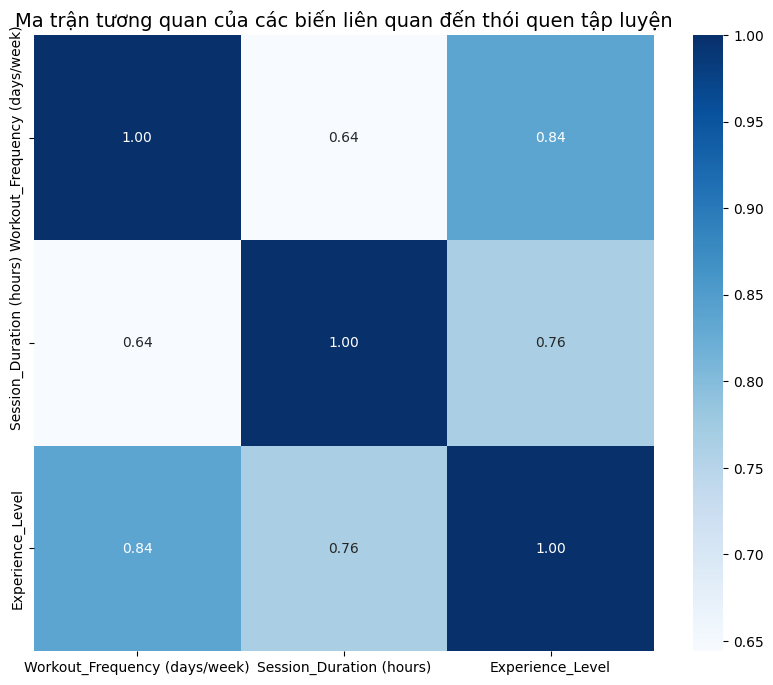

In [ ]:
# Chọn các biến liên quan đến cường độ tập luyện
correlation_features = ['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Experience_Level']

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[correlation_features].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Ma trận tương quan của các biến liên quan đến thói quen tập luyện", fontsize=14)
plt.show()


KIỂM TRA OUTLIERS



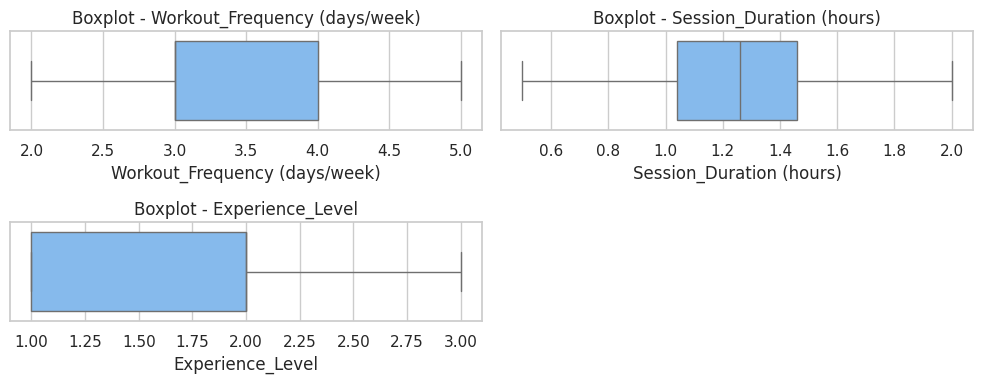

In [ ]:
sns.set(style='whitegrid')
# Danh sách các cột cần vẽ boxplot
num_cols = ['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Experience_Level']
plt.figure(figsize=(10, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # Tạo lưới 2x2
    sns.boxplot(x=data[col], color=sns.xkcd_rgb['sky blue'])
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# **XÂY DỰNG CÁC GIẢ THUYẾT ĐỂ KIỂM ĐỊNH**



 Giả thuyết 1: Con trai và con gái thời gian tập luyện như nhau.

*   H0: Giới tính không ảnh hưởng đến thời gian tập luyện trung bình (Session_Duration).
*   H1: Giới tính có ảnh hưởng đến thời gian tập luyện trung bình (Session_Duration).

In [ ]:
data['Gender'].value_counts()

,count
Gender,
1,511
0,462


In [ ]:
male_ = data[data['Gender'] == 1]['Session_Duration (hours)']
female_ = data[data['Gender'] == 0]['Session_Duration (hours)']

male_array = np.array(male_)
female_array = np.array(female_)

variance_male = (male_array).var(ddof = 1)
variance_female = (female_array).var(ddof = 1)

print(f'Phương sai của giới tính nam: {variance_male:.2f}')
print(f'Phương sai của giới tính nữ: {variance_female:.2f}')

Phương sai của giới tính nam: 0.12
Phương sai của giới tính nữ: 0.12


In [ ]:
from statsmodels.stats import weightstats
alpha = 0.05
confidence_level = 1 - alpha

col1 = weightstats.DescrStatsW(male_)
col2 = weightstats.DescrStatsW(female_)
cm_obj = weightstats.CompareMeans(col1, col2)
zstat, pvalue = cm_obj.ztest_ind(usevar='unequal')

if (pvalue < alpha):
    print(f'Trị số p = {pvalue:.4f} < {alpha}',
          'nên bác bỏ H0.\n=> μ[Male] != μ[Female]')
else:
    print(f'Trị số p = {pvalue:.4f} >= {alpha}',
          'nên chấp nhận H0.\n=> μ[Male] == μ[Female]')

Trị số p = 0.7037 >= 0.05 nên chấp nhận H0.
=> μ[Male] == μ[Female]


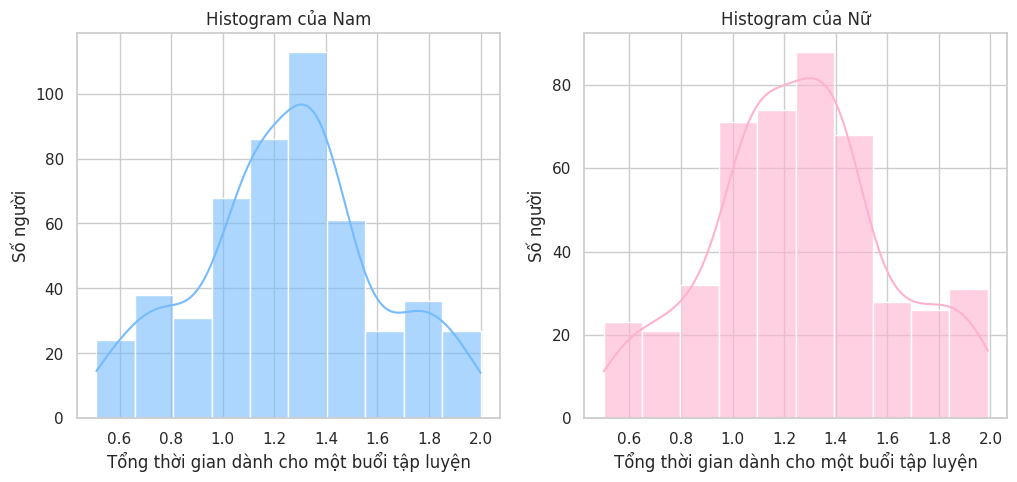

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(male_, bins=10, color=sns.xkcd_rgb['sky blue'],
             alpha=0.6, kde=True, ax=ax1)
ax1.set_title('Histogram của Nam')
ax1.set_xlabel('Tổng thời gian dành cho một buổi tập luyện')
ax1.set_ylabel('Số người')

sns.histplot(female_, bins=10, color=sns.xkcd_rgb['powder pink'],
             alpha=0.6, kde=True, ax=ax2)
ax2.set_title('Histogram của Nữ')
ax2.set_xlabel('Tổng thời gian dành cho một buổi tập luyện')
ax2.set_ylabel('Số người')
plt.show()

Kết quả phân tích với mức ý nghĩa 5% cho thấy p-value lớn hơn α, dẫn đến việc chấp nhận giả thuyết H0 rằng giới tính không ảnh hưởng đến thời gian tập luyện trung bình. Điều này cho thấy sự tương đồng trong thói quen tập luyện giữa nam và nữ trong nhóm tham gia nghiên cứu. Các yếu tố khác như độ tuổi, mục tiêu cá nhân, sở thích, hoặc lối sống có thể đóng vai trò quan trọng hơn trong việc hình thành và duy trì thói quen tập luyện.

Giả thuyết 2: Ảnh hưởng của kinh nghiệm tập luyện:
* H0: Mức độ kinh nghiệm (Experience_Level) không ảnh hưởng đến tần suất tập luyện (Workout_Frequency).
* H1: Mức độ kinh nghiệm (Experience_Level) ảnh hưởng đến tần suất tập luyện (Workout_Frequency).


In [ ]:
# Phân nhóm theo Experience_Level
beginner = data[data['Experience_Level'] == 1]['Workout_Frequency (days/week)']
intermediate = data[data['Experience_Level'] == 2]['Workout_Frequency (days/week)']
expert = data[data['Experience_Level'] == 3]['Workout_Frequency (days/week)']

# Tính phương sai cho từng nhóm
variance_beginner = beginner.var(ddof=1)
variance_intermediate = intermediate.var(ddof=1)
variance_expert = expert.var(ddof=1)

# In kết quả phương sai
print(f"Phương sai Beginner: {variance_beginner:.2f}")
print(f"Phương sai Intermediate: {variance_intermediate:.2f}")
print(f"Phương sai Expert: {variance_expert:.2f}")

Phương sai Beginner: 0.25
Phương sai Intermediate: 0.25
Phương sai Expert: 0.25


In [ ]:
# Kiểm định ANOVA
anova_stat, p_value = stats.f_oneway(beginner, intermediate, expert)
print(f"ANOVA statistic = {anova_stat:.4f}")
print(f"P-value = {p_value:.4f}")

## Kết luận theo phương pháp p-value (trị số p)
if (p_value < alpha):
    print(f'Trị số p = {p_value:.4f} < {alpha:.4f} cho nên bác bỏ H0: Mức độ kinh nghiệm ảnh hưởng đến tần suất tập luyện. ')
else:
    print(f'Trị số p = {p_value:.4f} >= {alpha:.4f} cho nên chấp nhận H0:Mức độ kinh nghiệm không ảnh hưởng đến tần suất tập luyện ')

ANOVA statistic = 1136.7577
P-value = 0.0000
Trị số p = 0.0000 < 0.0500 cho nên bác bỏ H0: Mức độ kinh nghiệm ảnh hưởng đến tần suất tập luyện. 


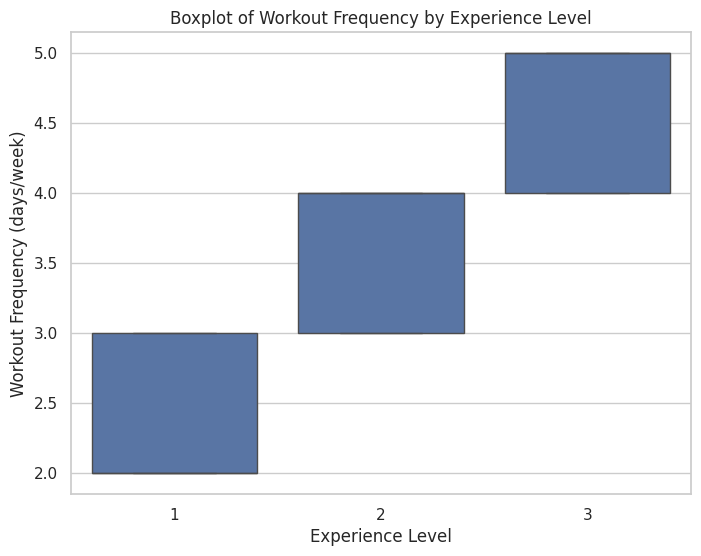

In [ ]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=data)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Boxplot of Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (days/week)')

# Hiển thị biểu đồ
plt.show()

Kết quả kiểm định cho thấy mức độ kinh nghiệm ảnh hưởng đến tần suất tập luyện (Workout_Frequency), với người có kinh nghiệm cao (Intermediate, Expert) tập luyện nhiều ngày hơn so với người mới bắt đầu (Beginner). Người có kinh nghiệm duy trì tần suất ổn định, trong khi người mới bắt đầu gặp khó khăn hơn.

Chiến lược:
* Beginner: Hỗ trợ duy trì tần suất tập luyện cao hơn.
* Intermediate/Expert: Khuyến khích thử thách với bài tập nâng cao.

Giả thuyết 3: Mối liên hệ giữa thời gian và tần suất tập luyện
*  H0: Không có mối quan hệ giữa thời gian tập luyện trung bình (Session_Duration) và tần suất tập luyện (Workout_Frequency).
*  H1: Có mối quan hệ giữa thời gian tập luyện trung bình (Session_Duration) và tần suất tập luyện (Workout_Frequency).

In [ ]:
from scipy.stats import pearsonr

# Tính hệ số tương quan Pearson và p-value
pearson_corr, p_value = pearsonr(data['Session_Duration (hours)'], data['Workout_Frequency (days/week)'])

# In kết quả
print(f"Hệ số tương quan Pearson: {pearson_corr}")
print(f"p-value: {p_value}")

# Kiểm định giả thuyết
alpha = 0.05  # Mức ý nghĩa 5%
if p_value < alpha:
    print(f'Trị số p = {p_value:.4f} < {alpha:.4f} Bác bỏ H0: Có mối quan hệ giữa thời gian tập luyện và tần suất tập luyện.')
else:
    print(f'Trị số p = {p_value:.4f} < {alpha:.4f} Không bác bỏ H0: Không có mối quan hệ giữa thời gian tập luyện và tần suất tập luyện.')


Hệ số tương quan Pearson: 0.6441403663606264
p-value: 3.8261782781040113e-115
Trị số p = 0.0000 < 0.0500 Bác bỏ H0: Có mối quan hệ giữa thời gian tập luyện và tần suất tập luyện.


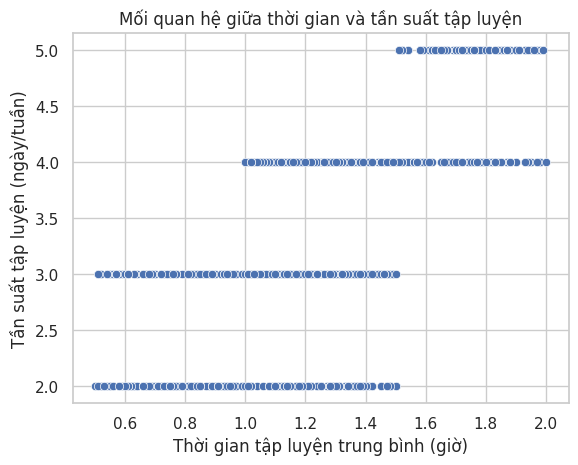

In [ ]:
# Vẽ biểu đồ scatter plot
sns.scatterplot(x='Session_Duration (hours)', y='Workout_Frequency (days/week)', data=data)
plt.title('Mối quan hệ giữa thời gian và tần suất tập luyện')
plt.xlabel('Thời gian tập luyện trung bình (giờ)')
plt.ylabel('Tần suất tập luyện (ngày/tuần)')
plt.show()


Kết quả kiểm định bác bỏ giả thuyết H0, cho thấy thời gian tập luyện (Session_Duration) và tần suất tập luyện (Workout_Frequency) có mối quan hệ đáng kể. Người tập nhiều ngày hơn mỗi tuần thường dành nhiều thời gian hơn cho mỗi buổi tập, cải thiện hiệu quả rèn luyện.

Chiến lược:

* Tăng dần tần suất tập từ 2 lên 3 ngày/tuần để xây dựng thói quen.
* Cá nhân hóa chương trình tập, khuyến khích tăng số ngày thay vì kéo dài buổi tập để đạt mục tiêu bền vững.

Giả thuyết 4: Người có kinh nghiệm cao (Experience_Level) có thời gian tập luyện (Session_Duration) lâu hơn.
* H0: Thời gian tập luyện trung bình không phụ thuộc vào mức độ kinh nghiệm.
* H1: Thời gian tập luyện trung bình thay đổi theo mức độ kinh nghiệm.


In [ ]:
# Nhóm dữ liệu theo Experience_Level
beginner = data[data['Experience_Level'] == 1]['Session_Duration (hours)']
intermediate = data[data['Experience_Level'] == 2]['Session_Duration (hours)']
expert = data[data['Experience_Level'] == 3]['Session_Duration (hours)']

beginner_array = np.array(beginner)
intermediate_array = np.array(intermediate)
expert_array = np.array(expert)

# Tính phương sai
variance_beginner = beginner_array.var(ddof=1)
variance_intermediate = intermediate_array.var(ddof=1)
variance_advanced = expert_array.var(ddof=1)

# In kết quả
print(f'Phương sai của thời gian tập luyện (Session_Duration) cho người mới bắt đầu: {variance_beginner:.2f}')
print(f'Phương sai của thời gian tập luyện (Session_Duration) cho người trung cấp: {variance_intermediate:.2f}')
print(f'Phương sai của thời gian tập luyện (Session_Duration) cho người nâng cao: {variance_advanced:.2f}')


Phương sai của thời gian tập luyện (Session_Duration) cho người mới bắt đầu: 0.08
Phương sai của thời gian tập luyện (Session_Duration) cho người trung cấp: 0.02
Phương sai của thời gian tập luyện (Session_Duration) cho người nâng cao: 0.02


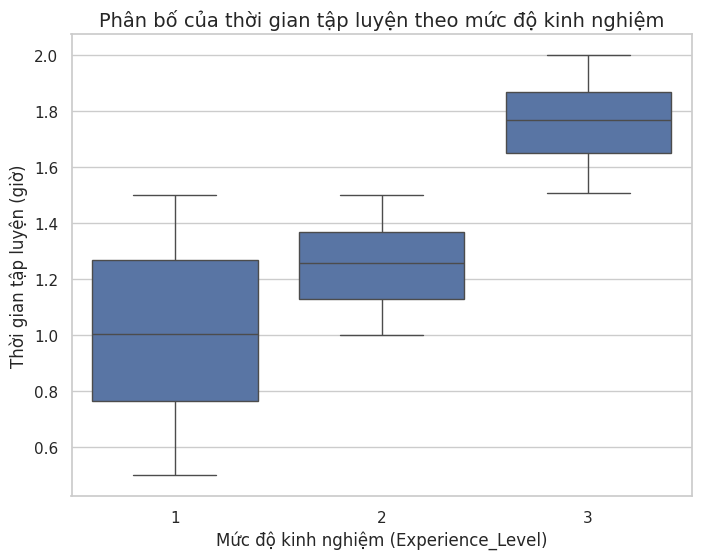

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Phân bố của thời gian tập luyện theo mức độ kinh nghiệm", fontsize=14)
sns.boxplot(x='Experience_Level', y='Session_Duration (hours)', data=data)
plt.xlabel("Mức độ kinh nghiệm (Experience_Level)", fontsize=12)
plt.ylabel("Thời gian tập luyện (giờ)", fontsize=12)
plt.show()

In [ ]:
# Kiểm định ANOVA
anova_stat, p_value = stats.f_oneway(beginner, intermediate, expert)
print(f"ANOVA statistic = {anova_stat:.4f}")
print(f"P-value = {p_value:.4f}")

## Kết luận theo phương pháp p-value (trị số p)
if (p_value < alpha):
    print(f'Trị số p = {p_value:.4f} < {alpha:.4f} Bác bỏ H0: Thời gian tập luyện trung bình khác nhau giữa các nhóm kinh nghiệm.')
else:
    print(f'Trị số p = {p_value:.4f} >= {alpha:.4f} Chấp nhận H0: Không có sự khác biệt về thời gian tập luyện giữa các nhóm kinh nghiệm.')

ANOVA statistic = 797.3186
P-value = 0.0000
Trị số p = 0.0000 < 0.0500 Bác bỏ H0: Thời gian tập luyện trung bình khác nhau giữa các nhóm kinh nghiệm.



Mức độ kinh nghiệm ảnh hưởng đáng kể đến thời gian tập luyện. Nhóm Intermediate và Expert dành nhiều thời gian tập hơn Beginner nhờ kiến thức về kỹ thuật, dinh dưỡng và phục hồi có vai trò quan trọng trong việc duy trì sự tập trung và cam kết.

Chiến lược:
* Beginner: Chương trình dễ tiếp cận, tăng thời lượng dần.
* Intermediate/Expert: Mục tiêu nâng cao, tập trung kỹ thuật

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
#Bảng Anova
model = ols('Q("Session_Duration (hours)") ~ Experience_Level', data=data).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Experience_Level,1.0,66.895797,66.895797,1368.027882,1.421093e-187
Residual,971.0,47.481356,0.048899,NaN,NaN
